In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
print(type(train_data))

<class 'numpy.ndarray'>


In [ ]:
train_data[0]
len(train_data[0])

87

In [ ]:
len(train_data[1])

56

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
np.max(train_labels)

np.int64(45)

In [ ]:
len(train_labels)

8982

In [ ]:
len(test_labels)

2246

In [ ]:
# decoding a review

# Key: word, Value: index
word_index = reuters.get_word_index()

# Key: index, Value: word
reversed_word_index = dict(
    (value, key) for (key, value) in word_index.items()
)

# decoded review

decoded_review = " ".join(reversed_word_index.get(i-3, "?") for i in train_data[25])
print(decoded_review)
print(train_labels[25])

? there were 106 200 tonnes of u s corn shipped to the soviet union in the week ended march 26 according to the u s agriculture department's latest export sales report there were no wheat or soybean shipments during the week the ussr has purchased 2 65 mln tonnes of u s corn as of march 26 for delivery in the fourth year of the u s ussr grain agreement total shipments in the third year of the u s ussr grains agreement which ended september 30 amounted to 152 600 tonnes of wheat 6 808 100 tonnes of corn and 1 518 700 tonnes of soybeans reuter 3
1


In [ ]:
def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences), dimension))
  # [[4,5,10], [46], [55,61, 19, 12, 10, 4], ...]
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
print(x_train.shape) # (8982, 10000)

x_test = vectorize_sequences(test_data) # (2246, 10000)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [ ]:
for i in range(1, 20, 3):
  print(train_labels[i])

4
4
3
3
4
16
21


In [ ]:
def to_one_hot(labels, dimension = 46):

  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [ ]:
y_train = to_one_hot(train_labels)
print(y_train.shape) # (8982, 46)

y_test = to_one_hot(test_labels)
print(y_test.shape) # (2246, 46)

(8982, 46)
(2246, 46)


In [ ]:
# Defintion
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [ ]:
# Compile
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
x_val = x_train[:1000]
print(x_val.shape) # (1000, 10000)
partial_x_train = x_train[1000:]
print(partial_x_train.shape) # (7982, 10000)
print()
y_val = y_train[:1000]
print(y_val.shape) # (1000, 46)
partial_y_train = y_train[1000:]
print(partial_y_train.shape)  # (7982, 46)


(1000, 10000)
(7982, 10000)

(1000, 46)
(7982, 46)


In [ ]:
# Fit
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size= 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.3496 - loss: 3.3899 - val_accuracy: 0.6310 - val_loss: 1.9358
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6712 - loss: 1.7208 - val_accuracy: 0.6960 - val_loss: 1.3933
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7407 - loss: 1.2269 - val_accuracy: 0.7440 - val_loss: 1.2008
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7852 - loss: 1.0234 - val_accuracy: 0.7570 - val_loss: 1.1032
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8233 - loss: 0.8282 - val_accuracy: 0.7810 - val_loss: 1.0263
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8522 - loss: 0.7015 - val_accuracy: 0.8000 - val_loss: 0.9616
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8810 - loss: 0.5948 - val_accuracy: 0.8070 - val_loss: 0.9200
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9023 - loss: 0.4790 - val_accuracy: 0.8100 - 

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

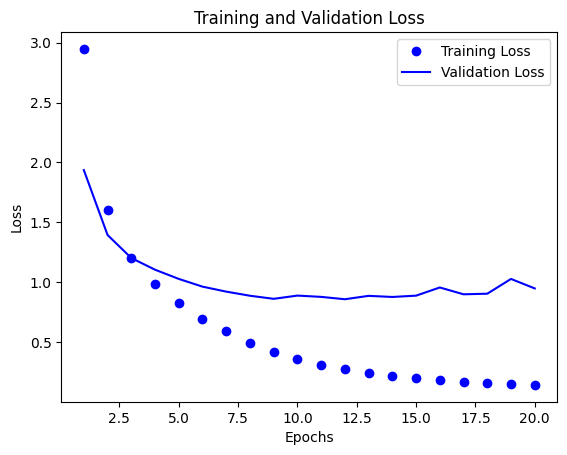

In [ ]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

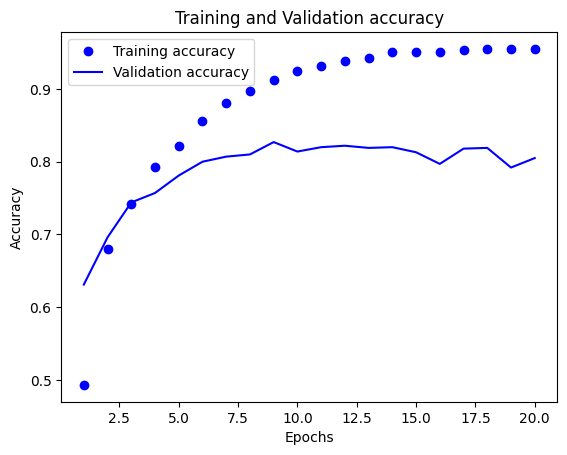

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Overfitting is taking place after 9 epochs
# Building a model using x_train and y_train and setting epochs = 9

In [ ]:
# Definiton
model = keras.Sequential( [
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [ ]:
# Compile
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# Final Fit
model.fit(x_train, y_train, epochs= 9 , batch_size = 512)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9292 - loss: 0.3420
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9346 - loss: 0.3011
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9449 - loss: 0.2624
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9483 - loss: 0.2266
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9514 - loss: 0.2037
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9528 - loss: 0.1884
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9581 - loss: 0.1675
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9617 - loss: 0.1506
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9596 - loss: 0.1466


In [ ]:
results = model.evaluate(x_test, y_test)
print(results)
# Loss: 0.954
# Accuracy: ~81%

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.9257
[0.9540081024169922, 0.8063223361968994]


In [ ]:
# Random baseline classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array.mean())
# 0.19545859305431879
# ~20%

0.19545859305431879


In [ ]:
predictions = model.predict(x_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))
print(y_test[0])